In [1]:
import json
import re

import matplotlib.pyplot as plt
import numpy as np
import tifffile as tf

In [2]:
def extract_data_from_tif(tif_image):
    name = tif_image.split('/')[-1]
    name = name.split('.')[0]
    with tf.TiffFile(tif_image) as tiffile:
        arrays = []
        for i, page in enumerate(tiffile.pages):
            array = page.asarray()
            arrays.append(array)
    return name, arrays

In [3]:
name, data = extract_data_from_tif('./images/run2_area_01.tif')

print(name)
print(len(data))
data

run2_area_01
1


[array([[37332, 36211, 35647, ..., 34984, 34567, 45084],
        [46202, 40030, 44039, ..., 32821, 35233, 38766],
        [35845, 35799, 37199, ..., 45670, 22978, 34718],
        ...,
        [25443, 13621, 13621, ..., 13621, 13621, 25443],
        [25443, 13621, 13621, ..., 13621, 13621, 25443],
        [25443, 25443, 25443, ..., 25443, 25443, 25443]],
       shape=(1331, 1536), dtype=uint16)]

Shape dell'array: (1331, 1536)
Tipo di valori nell'array: uint16


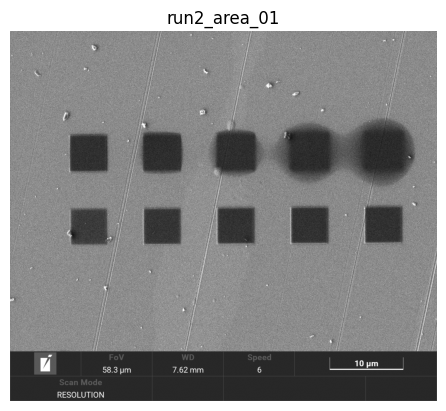

In [4]:
name, data = extract_data_from_tif('./images/run2_area_01.tif')
print(f"Shape dell'array: {data[0].shape}")
print(f"Tipo di valori nell'array: {data[0].dtype}")
plt.axis('off')
plt.title(name)
plt.imshow(data[0], 'gray')

Shape dell'array: (1094, 1536)
Tipo di valori nell'array: uint16


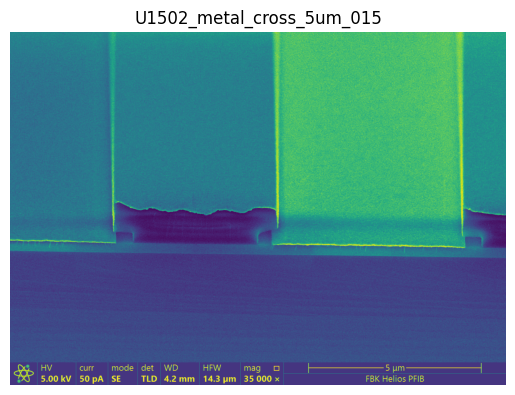

In [5]:
name, data = extract_data_from_tif('./images/U1502_metal_cross_5um_015.tif')
print(f"Shape dell'array: {data[0].shape}")
print(f"Tipo di valori nell'array: {data[0].dtype}")
plt.axis('off')
plt.title(name)
plt.imshow(data[0])

In [6]:
from PIL import Image

In [7]:
def extract_data_from_image_pilversion(tif_image):
    name = tif_image.split('/')[-1].split('.')[0]
    arrays = []

    with Image.open(tif_image) as img:
        i = 0
        while True:
            try:
                img.seek(i)  # vai alla pagina i
                arrays.append(np.array(img))  # converto in numpy array
                i += 1
            except EOFError:
                break  # fine delle pagine

    return name, arrays

Shape dell'array: (1331, 1536)
Tipo di valori nell'array: uint16


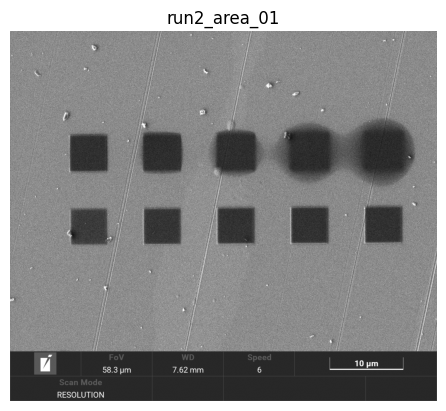

In [8]:
name, data = extract_data_from_image_pilversion('./images/run2_area_01.tif')

print(f"Shape dell'array: {data[0].shape}")
print(f"Tipo di valori nell'array: {data[0].dtype}")
plt.axis('off')
plt.title(name)
plt.imshow(data[0], 'gray')

Shape dell'array: (512, 512, 3)
Tipo di valori nell'array: uint8


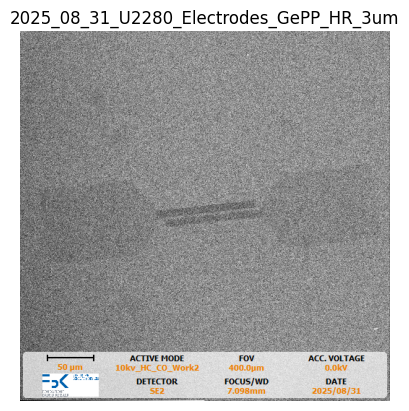

In [9]:
name, data = extract_data_from_image_pilversion(
    './images/2025_08_31_U2280_Electrodes_GePP_HR_3um.bmp'
)

print(f"Shape dell'array: {data[0].shape}")
print(f"Tipo di valori nell'array: {data[0].dtype}")
plt.axis('off')
plt.title(name)
plt.imshow(data[0])

In [10]:
def analyze_metadata_from_tif(tif_file):
    with tf.TiffFile(tif_file) as tif:
        page = tif.pages[0]
        for tag in page.tags:
            print(f'{tag.name} has code {tag.code}')

In [11]:
analyze_metadata_from_tif('./images/U1502_metal_cross_5um_015.tif')

ImageWidth has code 256
ImageLength has code 257
BitsPerSample has code 258
Compression has code 259
PhotometricInterpretation has code 262
StripOffsets has code 273
SamplesPerPixel has code 277
RowsPerStrip has code 278
StripByteCounts has code 279
XResolution has code 282
YResolution has code 283
PlanarConfiguration has code 284
ResolutionUnit has code 296
ExifTag has code 34665
FEI_HELIOS has code 34682


In [12]:
def show_value_for_tags(tif_file):
    with tf.TiffFile(tif_file) as tif:
        page = tif.pages[0]
        for tag in page.tags:
            print(f'{tag.name} has a type of {type(tag.value)} and value: {tag.value}')

In [13]:
show_value_for_tags('./images/U1502_metal_cross_5um_015.tif')

ImageWidth has a type of <class 'int'> and value: 1536
ImageLength has a type of <class 'int'> and value: 1094
BitsPerSample has a type of <class 'int'> and value: 16
Compression has a type of <enum 'COMPRESSION'> and value: 1
PhotometricInterpretation has a type of <enum 'PHOTOMETRIC'> and value: 1
StripOffsets has a type of <class 'tuple'> and value: (8, 3080, 6152, 9224, 12296, 15368, 18440, 21512, 24584, 27656, 30728, 33800, 36872, 39944, 43016, 46088, 49160, 52232, 55304, 58376, 61448, 64520, 67592, 70664, 73736, 76808, 79880, 82952, 86024, 89096, 92168, 95240, 98312, 101384, 104456, 107528, 110600, 113672, 116744, 119816, 122888, 125960, 129032, 132104, 135176, 138248, 141320, 144392, 147464, 150536, 153608, 156680, 159752, 162824, 165896, 168968, 172040, 175112, 178184, 181256, 184328, 187400, 190472, 193544, 196616, 199688, 202760, 205832, 208904, 211976, 215048, 218120, 221192, 224264, 227336, 230408, 233480, 236552, 239624, 242696, 245768, 248840, 251912, 254984, 258056, 2611

In [14]:
analyze_metadata_from_tif('./images/run2_area_01.tif')

ImageWidth has code 256
ImageLength has code 257
BitsPerSample has code 258
Compression has code 259
PhotometricInterpretation has code 262
Make has code 271
Model has code 272
StripOffsets has code 273
Orientation has code 274
SamplesPerPixel has code 277
RowsPerStrip has code 278
StripByteCounts has code 279
PlanarConfiguration has code 284
Software has code 305
DateTime has code 306
Artist has code 315
50431 has code 50431


In [15]:
show_value_for_tags('./images/run2_area_01.tif')

ImageWidth has a type of <class 'int'> and value: 1536
ImageLength has a type of <class 'int'> and value: 1331
BitsPerSample has a type of <class 'int'> and value: 16
Compression has a type of <enum 'COMPRESSION'> and value: 1
PhotometricInterpretation has a type of <enum 'PHOTOMETRIC'> and value: 1
Make has a type of <class 'str'> and value: TESCAN - http://www.tescan.com/
Model has a type of <class 'str'> and value: TESCAN NISABA TESCAN NISABA
StripOffsets has a type of <class 'tuple'> and value: (8, 6152, 12296, 18440, 24584, 30728, 36872, 43016, 49160, 55304, 61448, 67592, 73736, 79880, 86024, 92168, 98312, 104456, 110600, 116744, 122888, 129032, 135176, 141320, 147464, 153608, 159752, 165896, 172040, 178184, 184328, 190472, 196616, 202760, 208904, 215048, 221192, 227336, 233480, 239624, 245768, 251912, 258056, 264200, 270344, 276488, 282632, 288776, 294920, 301064, 307208, 313352, 319496, 325640, 331784, 337928, 344072, 350216, 356360, 362504, 368648, 374792, 380936, 387080, 39322

In [16]:
def search_quantities(text):
    tag_dict = {}
    pattern = r'([A-Z]\w+)\s*=\s*((?:(?!\\n)[^;,])+)'
    matches = re.findall(pattern, text)
    for name, value in matches:
        tag_dict[name] = value

    return tag_dict

In [17]:
def get_json_dict(s: str):
    """Ritorna il dict se s è valido, altrimenti stringa semplice."""
    try:
        obj = json.loads(s)
    except (ValueError, TypeError):
        return None
    return obj if isinstance(obj, dict) else s

In [18]:
def extract_metadata_from_tif(percorso):
    dictionar = {}
    with tf.TiffFile(percorso) as tiffile:
        dictionar['file_name'] = percorso.split('/')[-1]
        for i, page in enumerate(tiffile.pages):
            mio_dict = {}
            for tag in page.tags:
                try:
                    if isinstance(tag.value, str):
                        mio_dict[tag.name] = get_json_dict(tag.value)
                    elif isinstance(tag.value, float | int):
                        mio_dict[tag.name] = tag.value
                    elif isinstance(tag.value, tuple):
                        pass
                        # mio_dict[tag.name] = list(tag.value)
                    elif isinstance(tag.value, bytes):
                        new = str(tag.value)
                        mio_dict.setdefault(tag.code, search_quantities(new))
                    elif isinstance(tag.value, dict):
                        mio_dict[tag.name] = tag.value
                except Exception:
                    mio_dict[tag.name] = 'Non leggibile'
            dictionar[f'page_{i + 1}'] = mio_dict
    return dictionar

In [19]:
extract_metadata_from_tif('./images/run2_area_01.tif')

{'file_name': 'run2_area_01.tif',
 'page_1': {'ImageWidth': 1536,
  'ImageLength': 1331,
  'BitsPerSample': 16,
  'Compression': <COMPRESSION.NONE: 1>,
  'PhotometricInterpretation': <PHOTOMETRIC.MINISBLACK: 1>,
  'Make': None,
  'Model': None,
  'Orientation': <ORIENTATION.TOPLEFT: 1>,
  'SamplesPerPixel': 1,
  'RowsPerStrip': 2,
  'PlanarConfiguration': <PLANARCONFIG.CONTIG: 1>,
  'Software': None,
  'DateTime': None,
  'Artist': None,
  50431: {'AccFrames': '1',
   'AccType': 'Line',
   'Date': '2025-07-15',
   'Device': 'TESCAN NISABA',
   'DeviceModel': 'L7151',
   'FullUserName': 'acian',
   'ImageStripSize': '179',
   'Magnification': '7180.1280174',
   'MagnificationReference': '0.4188',
   'OrigFileName': 'run2_area_01',
   'PixelSizeX': '0.000000037973731',
   'PixelSizeY': '0.000000037973731',
   'SerialNumber': '119-0250',
   'SoftwareVersion': 'TESCAN Essence Version 1.3.3.1',
   'Time': '15:40:18',
   'UserName': 'acian',
   'ViewFieldsCountX': '1',
   'ViewFieldsCountY':

In [20]:
extract_metadata_from_tif('./images/U1502_metal_cross_5um_015.tif')

{'file_name': 'U1502_metal_cross_5um_015.tif',
 'page_1': {'ImageWidth': 1536,
  'ImageLength': 1094,
  'BitsPerSample': 16,
  'Compression': <COMPRESSION.NONE: 1>,
  'PhotometricInterpretation': <PHOTOMETRIC.MINISBLACK: 1>,
  'SamplesPerPixel': 1,
  'RowsPerStrip': 1,
  'PlanarConfiguration': <PLANARCONFIG.CONTIG: 1>,
  'ResolutionUnit': <RESUNIT.INCH: 2>,
  'ExifTag': {'ImageUniqueID': 'EED26DBD8BD3AACF720997A065288DD5'},
  'FEI_HELIOS': {'User': {'Date': '08/01/2025',
    'Time': '04:00:39 PM',
    'User': 'Supervisor',
    'UserText': 'FBK Helios PFIB',
    'UserTextUnicode': '460042004B002000480065006C0069006F00730020005000460049004200'},
   'System': {'Type': 'DualBeam',
    'Dnumber': 9955155,
    'Software': '17.22.0.19782',
    'BuildNr': 19782,
    'Source': 'FEG',
    'Column': 'Elstar',
    'FinalLens': 'Elstar',
    'Chamber': 'xT-SDB',
    'Stage': '110 x 110',
    'Pump': 'TMP',
    'ESEM': 'no',
    'Aperture': 'AVA',
    'Scan': 'PIA 4',
    'Acq': 'PIA 4',
    'EucWD'

In [21]:
analyze_metadata_from_tif('./images/2025_08_31_U2280_Electrodes_GePP_HR_3um.tif')

NewSubfileType has code 254
ImageWidth has code 256
ImageLength has code 257
BitsPerSample has code 258
Compression has code 259
PhotometricInterpretation has code 262
Make has code 271
StripOffsets has code 273
Orientation has code 274
SamplesPerPixel has code 277
RowsPerStrip has code 278
StripByteCounts has code 279
XResolution has code 282
YResolution has code 283
ResolutionUnit has code 296
Software has code 305


In [22]:
extract_metadata_from_tif('./images/2025_08_31_U2280_Electrodes_GePP_HR_3um.tif')

{'file_name': '2025_08_31_U2280_Electrodes_GePP_HR_3um.tif',
 'page_1': {'NewSubfileType': <FILETYPE.UNDEFINED: 0>,
  'ImageWidth': 512,
  'ImageLength': 512,
  'BitsPerSample': 8,
  'Compression': <COMPRESSION.NONE: 1>,
  'PhotometricInterpretation': <PHOTOMETRIC.MINISBLACK: 1>,
  'Make': None,
  'Orientation': <ORIENTATION.TOPLEFT: 1>,
  'SamplesPerPixel': 1,
  'RowsPerStrip': 512,
  'ResolutionUnit': <RESUNIT.NONE: 1>,
  'Software': None}}

In [23]:
extract_metadata_from_tif('./images/2025_08_31_U2280_Electrodes_GePP_HR_3um_new.tif')

{'file_name': '2025_08_31_U2280_Electrodes_GePP_HR_3um_new.tif',
 'page_1': {'NewSubfileType': <FILETYPE.UNDEFINED: 0>,
  'ImageWidth': 512,
  'ImageLength': 512,
  'BitsPerSample': 8,
  'Compression': <COMPRESSION.NONE: 1>,
  'PhotometricInterpretation': <PHOTOMETRIC.MINISBLACK: 1>,
  'Make': None,
  'Orientation': <ORIENTATION.TOPLEFT: 1>,
  'SamplesPerPixel': 1,
  'RowsPerStrip': 16,
  'PlanarConfiguration': <PLANARCONFIG.CONTIG: 1>,
  'ResolutionUnit': <RESUNIT.NONE: 1>,
  'Software': None,
  '60000': {'Acc. Voltage': 0.0,
   'Active Mode': '10kv_HC_CO_Work2',
   'Average Count': '1',
   'Average Type': 'Moving Frame Averaging',
   'Date': '2025/08/31',
   'Detector': 'SE2',
   'FoV': 0.0004,
   'Focus/WD': 0.007098,
   'Pixel Dwelltime': 2e-06,
   'Point Average': '1',
   'Position U': 0.001037,
   'Position V': 0.0024965,
   'Probe Current': 2.05e-11,
   'Project': '%UserRoot%Project\\New.DSK',
   'Stage R': 0.0,
   'Stage T': 0.0,
   'Stage X': 0.0180453,
   'Stage Y': -0.039392